# NAME: HARSHAVARDHAN S V

# ROLL NO: 20BCS040

In [70]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sklearn
import sklearn.model_selection
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
location = "/content/drive/MyDrive/Harshavardhan S V - Major Project/adult.csv"

In [72]:
names = ['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

data = pd.read_csv(location,header = None)
data.columns = names
data.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
data.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:

data = data.replace(" ?", np.nan).dropna(axis=0)


In [75]:
le = preprocessing.LabelEncoder()

In [76]:
data['Workclass'] = le.fit_transform(list(data['Workclass']))
data['Education'] = le.fit_transform(list(data['Education']))
data['marital_status'] = le.fit_transform(list(data['marital_status']))
data['occupation'] = le.fit_transform(list(data['occupation']))
data['relationship'] = le.fit_transform(list(data['relationship']))
data['race'] = le.fit_transform(list(data['race']))
data['sex'] = le.fit_transform(list(data['sex']))
data['native_country'] = le.fit_transform(list(data['native_country']))
data['income'] = le.fit_transform(list(data['income']))

incomex = [" <=50K"," >50K"]

In [77]:
data['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [78]:
X = data.drop('income',axis='columns')
y = data['income']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((21113, 14), (9049, 14))

In [80]:
data.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

SVM

In [81]:
from sklearn import svm

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

scaling1 = MinMaxScaler(feature_range=(-1,1)).fit(X_test)


X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)


In [83]:
model = svm.SVC(kernel  = "linear", C = 2) 
model.fit(X_train,y_train)

SVC(C=2, kernel='linear')

In [84]:
model.score(X_test,y_test)

0.8034036910155818

In [85]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (7,5), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [86]:
truth =      []
prediction = []
X_test = pd.DataFrame(X_test)

for num in range(len(y_test)):




    pre = model.predict([X_test.iloc[num]])
    
    truth.append(incomex[y_test.iloc[num]])    
    prediction.append(incomex[pre[0]] )   

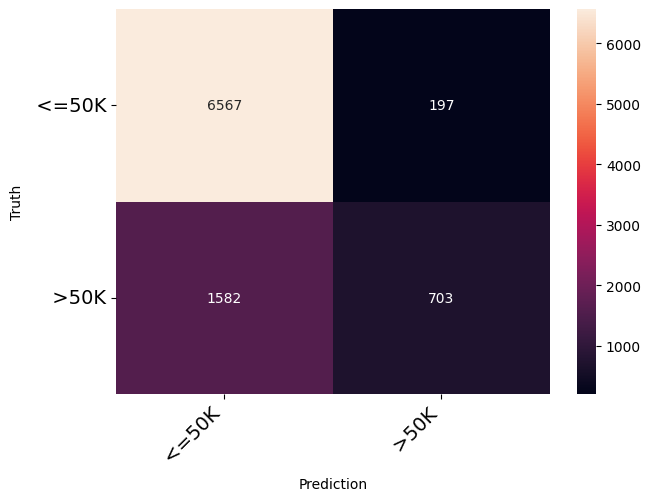

In [87]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[' <=50K', ' >50K'])

In [88]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      6764
        >50K       0.78      0.31      0.44      2285

    accuracy                           0.80      9049
   macro avg       0.79      0.64      0.66      9049
weighted avg       0.80      0.80      0.77      9049



KNN Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [90]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)


KNeighborsClassifier()

In [91]:
model.score(X_test,y_test)

0.8169963531881976

In [92]:
truth =      []
prediction = []
X_test = pd.DataFrame(X_test)

for num in range(len(y_test)):




    pre = model.predict([X_test.iloc[num]])
    
    truth.append(incomex[y_test.iloc[num]])    
    prediction.append(incomex[pre[0]] )   

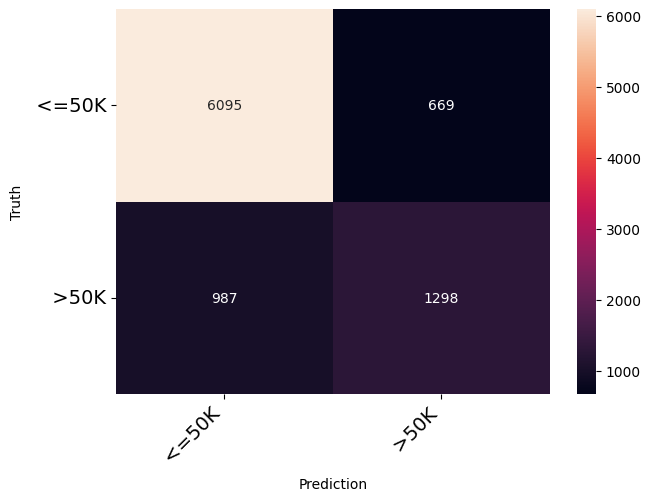

In [93]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,[' <=50K', ' >50K'])

In [94]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      6764
        >50K       0.66      0.57      0.61      2285

    accuracy                           0.82      9049
   macro avg       0.76      0.73      0.75      9049
weighted avg       0.81      0.82      0.81      9049

